# Macaque Motor Cortex recordings analysis

## 1. Firing Rate
Analyzing the responses of neuron unit #94 to direction 6 from 1 second before the go cue to 1 second afterward.

In [1]:
# load spiking models and analysis techniques
from compneuro import *

In [2]:
# read in the data
go_info = np.loadtxt('go.txt')
direction = np.loadtxt('direction.txt')
neuron94 = np.loadtxt('spike_trains/spike_train_unit_093.txt')

In [3]:
# find all the go cue timings where the direction is 6
indicies = np.where(direction == 6)
print(indicies[0].shape)
six_go_cues = go_info[indicies]
print(six_go_cues)

(24,)
[  45.287533  253.6178    539.259933  548.513667  552.603567  575.370933
  662.942533  667.3324    704.479367  768.6576    810.226467  820.688167
  828.885933  850.719333  892.2482    928.7672    943.784767  966.350167
 1099.5545   1145.277233 1164.5847   1176.920367 1226.197    1246.960433]


In [4]:
# find spiking times one second before the go cue to one second after
relative_spikes = []
for cue in six_go_cues:
    idxs = np.where(abs(neuron94 - cue) <= 1)
    relative_spikes.append(neuron94[idxs] - cue)
print(relative_spikes)

[array([-0.971366, -0.743066, -0.622533, -0.514133, -0.275366, -0.244833,
       -0.231   , -0.182   , -0.1621  , -0.136266, -0.0783  , -0.074766,
       -0.067033, -0.0482  ,  0.009867,  0.038034,  0.078934,  0.165167,
        0.177467,  0.2123  ,  0.231934,  0.275934,  0.336234,  0.401134,
        0.454734,  0.4806  ,  0.500134,  0.505834,  0.571767,  0.584834,
        0.592467,  0.686334,  0.8816  ,  0.903267,  0.978434]), array([-0.997533, -0.849633, -0.783533, -0.747767, -0.6021  , -0.5259  ,
       -0.4628  , -0.436533, -0.351867, -0.2855  , -0.272467, -0.198933,
       -0.063467, -0.060367, -0.022   ,  0.0315  ,  0.0914  ,  0.279267,
        0.402733,  0.470933,  0.518467,  0.5439  ,  0.615533,  0.630133,
        0.638733,  0.677767,  0.705533,  0.723233,  0.728133,  0.796567,
        0.8071  ,  0.8249  ,  0.840333,  0.845233,  0.8503  ,  0.864333,
        0.906133,  0.9157  ,  0.961333]), array([-0.904066, -0.8401  , -0.8293  , -0.772566, -0.7447  , -0.6575  ,
       -0.6139  ,

## a) Raster plot showing 1 second before and 1 second after go cue

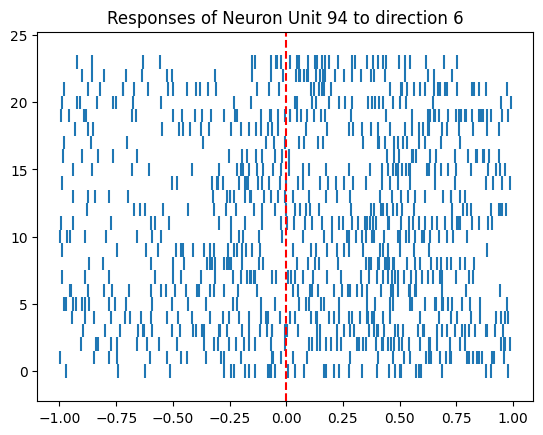

In [5]:
plt.eventplot(relative_spikes);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5);
plt.title("Responses of Neuron Unit 94 to direction 6");

## b) Trial averaged spike count from the 2 second window centered at the go cue

In [6]:
totals = [len(x) for x in relative_spikes]
print(f"Trial-averaged spike count during the period [-1,1] sec relative to the go cue: {sum(totals)/len(totals)}")

Trial-averaged spike count during the period [-1,1] sec relative to the go cue: 38.5


## c) Peri-Stimulus Time histogram with 50 ms bin-size

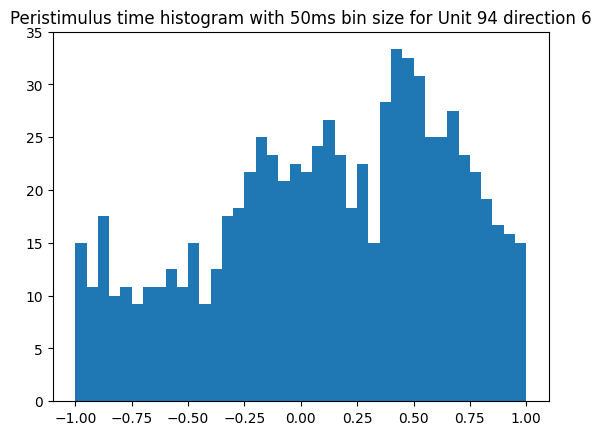

In [7]:
bin_centers, counts = psth(relative_spikes, 0.05, -1, 1)
plt.bar(bin_centers, counts, width=0.05);
plt.title("Peristimulus time histogram with 50ms bin size for Unit 94 direction 6");

## d) Using Gaussian filters of different widths to visualize a smooth function of firing rate over time

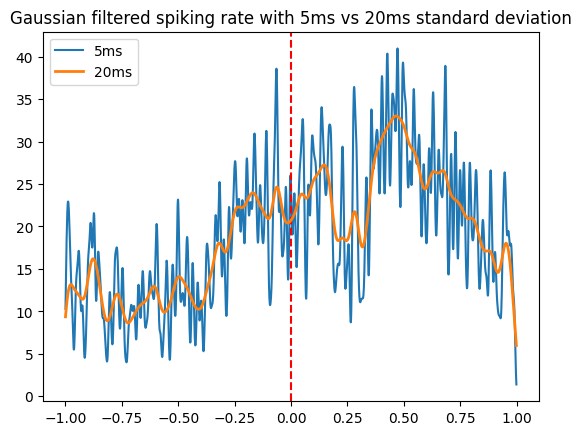

In [8]:
# values for x-axis
spacing = np.arange(-1,1,0.001)

# convolve a gaussian with the spike trains to get a smooth version
smooth5ms_spikes = [gauss_kernel(spike_train, spacing, bandwidth=0.005) for spike_train in relative_spikes]

# get an average smoothed version of the spike rate
averaged5ms = np.zeros(spacing.shape)
for spike_train in smooth5ms_spikes:
    averaged5ms += spike_train
averaged5ms = averaged5ms / len(smooth5ms_spikes)

plt.plot(spacing, averaged5ms, label="5ms");
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5);
plt.title("Gaussian filtered spiking rate with 5ms standard deviation");

# similar method with larger standard deviation of the gaussian so smoother function
smooth20ms_spikes = [gauss_kernel(spike_train, spacing, bandwidth=0.02) for spike_train in relative_spikes]
averaged20ms = np.zeros(spacing.shape)
for spike_train in smooth20ms_spikes:
    averaged20ms += spike_train
averaged20ms = averaged20ms / len(smooth20ms_spikes)
plt.plot(spacing, averaged20ms, lw=2, label="20ms");
plt.legend();
plt.title("Gaussian filtered spiking rate with 5ms vs 20ms standard deviation");
plt.show();

# 2. Tuning Curve

## a) Plot the tuning curve of Unit #94 (average firing rates during [-1,1] seconds relative to the go cue over the eight directions).

In [9]:
# hold all the directions
directions = [1,2,3,4,5,6,7,8]
big_indicies = [np.where(direction == d) for d in directions]
go_cues = [go_info[i] for i in big_indicies]

average_rates = []
# find the trial average rate for each direction
for dir in go_cues:
    rate_holder = []
    for cue in dir:
        idxs = np.where(abs(neuron94 - cue) <= 1)
        rate_holder.append(len(neuron94[idxs]) / 2.0)
    average_rates.append(sum(rate_holder) / len(rate_holder))
print(f"Averaged firing rates by direction: {average_rates}")

Averaged firing rates by direction: [19.964285714285715, 13.75, 7.409090909090909, 8.825, 14.28, 19.25, 20.4375, 20.794117647058822]


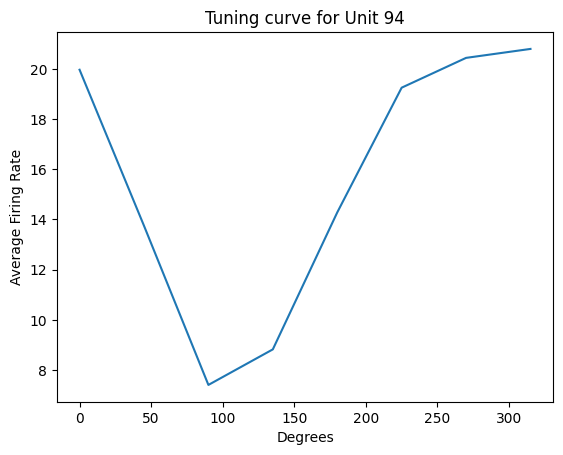

In [10]:
# plot the tuning curve
angles = np.array([0, 45, 90, 135, 180, 225, 270, 315])
plt.plot(angles, average_rates);
plt.xlabel('Degrees')
plt.ylabel('Average Firing Rate')
plt.title("Tuning curve for Unit 94");

## b) Fit a cosine function to the tuning curve

In [ ]:
# function to fix the popt from the optimization of the curve if F1 is negative or theta_pref isn't withing [0, 360)
def fixPopt(arr):
    """
    Function fixes the scipy optimize output for cosine fitting.

    Parameters
    -----------
    arr : list of fitted parameters given by scipy.optimize.curve_fit

    Returns
    -------
    list
        Fixed fitted params
    """

    r0 = arr[0]
    F1 = arr[1]
    theta_pref = arr[2]
    if F1 < 0:
        F1 = -F1
        theta_pref = (theta_pref + 180) % 360
    elif theta_pref > 360 or theta_pref < 0:
        theta_pref = theta_pref % 360
    return [r0, F1, theta_pref]

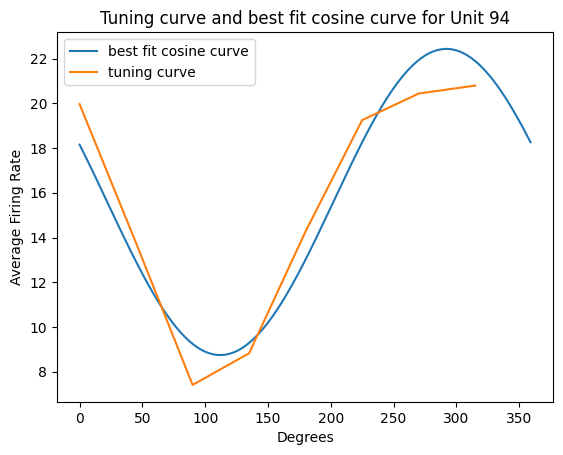

In [12]:
from scipy.optimize import curve_fit

def cosine_fit(x, r0, F1, theta_pref):
    return r0 + F1*np.cos(((x - theta_pref)*np.pi)/(180))

popt, pcov = curve_fit(cosine_fit, angles, average_rates)

popt = fixPopt(popt)

anglesfull = np.arange(0,360,1)
optimized = cosine_fit(anglesfull, popt[0], popt[1], popt[2])
plt.plot(anglesfull, optimized, label='best fit cosine curve');
plt.plot(angles, average_rates, label='tuning curve');
plt.xlabel('Degrees')
plt.ylabel('Average Firing Rate')
plt.title("Tuning curve and best fit cosine curve for Unit 94");
plt.legend();
plt.show();

The preferred direction of $\theta_{pref}$ for Unit #94 appears to be direction 8, or 315 degrees because this is where the average firing rate is highest.

## c) Compute and save the fitted parameters of tuning curves for all units

In [13]:
r0, F1, theta_pref = [], [], []
for i in range(143):
    neuron = np.loadtxt(f"spike_trains/spike_train_unit_{i:03}.txt")
    if len(neuron) != 0:
        average_rates = []
        # find the trial average rate for each direction
        for dir in go_cues:
            rate_holder = []
            for cue in dir:
                idxs = np.where(abs(neuron - cue) <= 1)
                rate_holder.append(len(neuron[idxs]) / 2.0)
            average_rates.append(sum(rate_holder) / len(rate_holder))
        popt, pcov = curve_fit(cosine_fit, angles, average_rates)
        popt = fixPopt(popt)
        r0.append(popt[0])
        F1.append(popt[1])
        theta_pref.append(popt[2])

/tmp/ipykernel_12954/2919299038.py:3: UserWarning: loadtxt: input contained no data: "spike_trains/spike_train_unit_023.txt"
  neuron = np.loadtxt(f"spike_trains/spike_train_unit_{i:03}.txt")


## d) Plot population histograms of the three fitted parameters and $\frac{F_1}{r_0}$ which measures relative modulation of the tuning curves, on the same figure with four separate subplots.

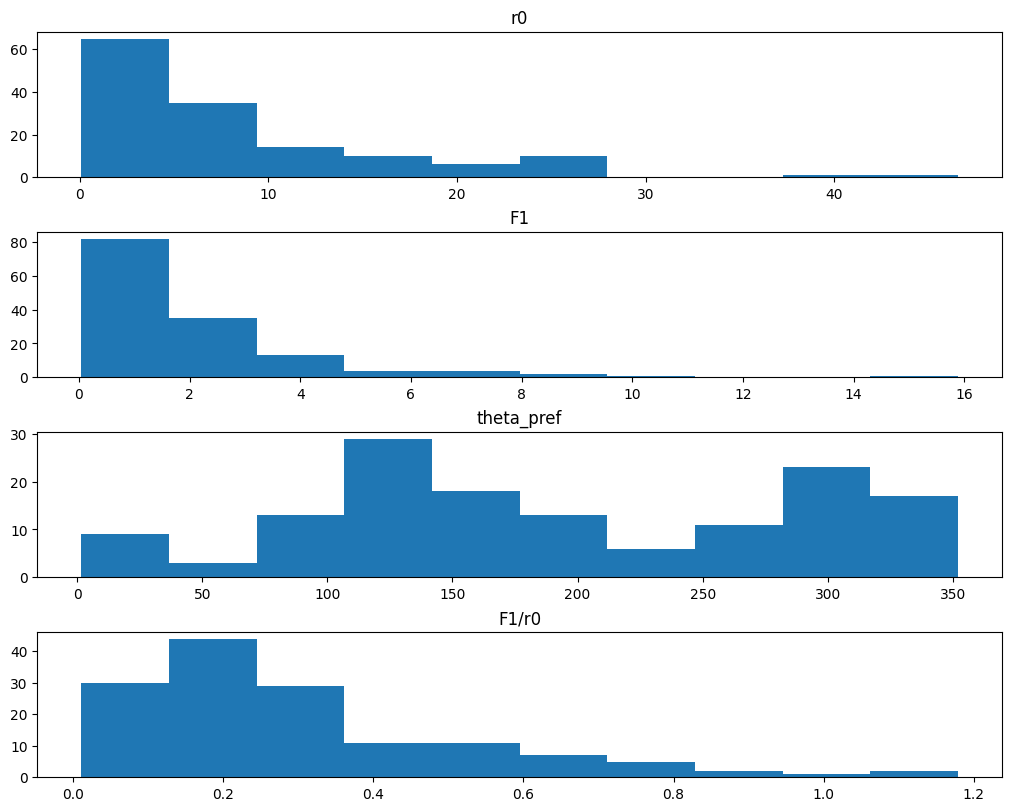

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), constrained_layout=True)
axes = axes.ravel()

F1overr0 = [x / y for x, y in zip(F1, r0)]

axes[0].hist(r0);
axes[0].set_title("r0");
axes[1].hist(F1);
axes[1].set_title("F1");
axes[2].hist(theta_pref);
axes[2].set_title("theta_pref");
axes[3].hist(F1overr0);
axes[3].set_title("F1/r0");